# DeBCR API tutorial

In [1]:
import os
import numpy as np
import debcr

2025-02-19 13:33:23.634291: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-19 13:33:28.500551: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ayushke/micromamba/envs/debcr-cu11-env/lib/python3.9/site-packages/nvidia/cudnn/lib/:/fast/AG_Kudryashev/artsemi/software/cuda-11.7/lib64:/usr/local/cuda-11.5/lib64:/usr/local/cuda-10.2/targets/x86_64-linux/lib:/usr/local/cuda-10.1/lib64:/fast/AG_Kudryashev/Ulya/cuda-10.1/cuda-toolkit/lib64
2025-02-19 13:33:28.502356: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64

In [2]:
data_path = '/fast/AG_Kudryashev/artsemi/debcr_cryoet/DeBCR_org/LM_2D_CARE'
data_path

'/fast/AG_Kudryashev/artsemi/debcr_cryoet/DeBCR_org/LM_2D_CARE'

## Prepare DeBCR model

In [97]:
debcr_model = debcr.model.load()
print(debcr_model.input_shape, debcr_model.output_shape)
print(debcr_model.summary())

[(None, 128, 128, 1), (None, 64, 64, 1), (None, 32, 32, 1)] [(None, 128, 128, 1), (None, 64, 64, 1), (None, 32, 32, 1)]
Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 x0_input (InputLayer)          [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 x2_input (InputLayer)          [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 x4_input (InputLayer)          [(None, 32, 32, 1)]  0           []                               
                                                                       

# Custom raw data

## Load and prepare data

In [94]:
test_tiff = 'EXP278_Smed_fixed_RedDot1_sub_5_N7_m0010.tif'
test_tiff_path = f'{data_path}/raw/condition_1/{test_tiff}'
test_tiff_path

'/fast/AG_Kudryashev/artsemi/debcr_cryoet/DeBCR_org/LM_2D_CARE/raw/condition_1/EXP278_Smed_fixed_RedDot1_sub_5_N7_m0010.tif'

In [95]:
data_raw = debcr.data.load(test_tiff_path)
data_raw.shape

(95, 1024, 1024)

In [96]:
data_prep = debcr.data.prepare(data_raw)
data_prep.shape

(6080, 128, 128)

## Run prediciton

In [98]:
data_pred = debcr.model.predict(debcr_model, data_prep)
data_pred.shape

190/190 [==============================] - 36s 184ms/step


(6080, 128, 128)

## Visualize prediction

In [99]:
gt_tiff_path = f'{data_path}/raw/GT/{test_tiff}'
data_gt = debcr.data.load(gt_tiff_path)
data_gt_prep = debcr.data.prepare(data_gt)
data_gt_prep.shape

(6080, 128, 128)

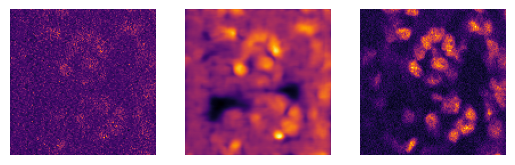

2346


In [136]:
import random
from debcr._core.show_utils import subShow3

slice_num = random.randint(0, data_pred.shape[0]-1)
subShow3(data_prep[slice_num].squeeze(), data_pred[slice_num].squeeze(), data_gt_prep[slice_num].squeeze())
print(slice_num)

# Provided test data

## Load and prepare data

In [67]:
test_npz_path = f'{data_path}/npz/test/LM_2D_CARE_test.npz'
test_npz_path

'/fast/AG_Kudryashev/artsemi/debcr_cryoet/DeBCR_org/LM_2D_CARE/npz/test/LM_2D_CARE_test.npz'

In [69]:
data_test = np.load(test_npz_path)
data_test.files

['gt', 'low']

In [70]:
data_test['gt'].shape, data_test['low'].shape 

((615, 128, 128), (615, 128, 128))

## Run prediction

In [71]:
data_test_pred = debcr.model.predict(debcr_model, data_test['low'])
data_test_pred.shape

20/20 [==============================] - 6s 254ms/step


(615, 128, 128)

## Visualize prediction

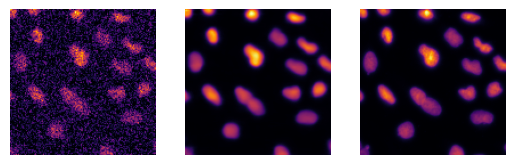

154


In [90]:
import random
from debcr._core.show_utils import subShow3

slice_num = random.randint(0, data_test_pred.shape[0]-1)
subShow3(data_test['low'][slice_num].squeeze(), data_test_pred[slice_num].squeeze(), data_test['gt'][slice_num].squeeze())
print(slice_num)